In [17]:
'''
Lucas Atayde, Alp Burke

File responsible for cleaning up our data pipeline. This will prepare our API to query the
data.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#usaa = pd.read_csv("./raw/US_Accidents_Dec19.csv", skiprows=range( int(2974335 * .30), 2974335))
usaa = pd.read_csv("./raw/US_Accidents_Dec19.csv")
# usaa = pd.read_csv("data_prep/raw/US_Accidents_Dec19.csv")

In [19]:
# Step 1: Convert accident ids to integers
usaa["ID"] = usaa["ID"].apply(lambda id: int(id[2:]))

# Drop unnecessary data. Makes computation slower and adds noise
# Country is the same for ALL.
# Source might effect data quality but ehhhh
usaa = usaa.drop(columns=["Source", "Country"])

In [20]:
def make_categorical(frame, col):
    # TODO: return dictionary mapping cat codes to values
    frame[col] = frame[col].astype("category").cat.codes

def fill_normal(frame, col):
    '''
    INPUT: An incomplete data frame 
    OUTPUT: A complete data frame filled with random samplings
            from the data, assuming it is normal 
    '''
    mean = usaa[col].mean()
    std = usaa[col].std()
    usaa[col] = usaa[col].apply(lambda val: np.random.normal(mean, std) if np.isnan(val) else val)

def num_missing(series):
    return series.isnull().sum()


In [21]:
# Fill in data with normal distribution
# TODO: Make this more sophisticated using nearest neighbors?
fill_normal(usaa, "Temperature(F)")

In [22]:
'''
TMC codes about traffic? Not exactly sure, will convert to categorical data
'''
make_categorical(usaa, "TMC")

In [23]:
# End lat and End long are both pretty much empty / worthless
usaa = usaa.drop(columns="End_Lng")
usaa = usaa.drop(columns="End_Lat")


In [24]:
cat = "City"
print(num_missing(usaa[cat]))
#usaa[cat].hist()
usaa[cat].unique()

83


array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Paron',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [25]:
usaa = usaa.dropna(subset=["City", "Zipcode"])

# We only want the first five digits of zipcode.
usaa["Zipcode"].apply(lambda zip: zip[:5])

0          45424
1          43068
2          45176
3          45417
4          45459
           ...  
2974330    92501
2974331    92108
2974332    92866
2974333    90230
2974334    92346
Name: Zipcode, Length: 2973372, dtype: object

In [26]:
# Airport code likely isn't important.
# We aren't going to worry about timezone either as it pertains to the data
usaa = usaa.dropna(subset=["Airport_Code", "Timezone"])

In [27]:
# For accidents without a weather timestamp we will use the start time of the accident
usaa["Weather_Timestamp"] = usaa["Weather_Timestamp"].fillna(usaa["Start_Time"])

Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Speed(mph)
Precipitation(in)


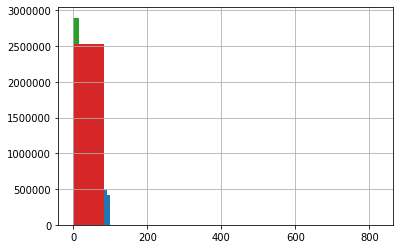

In [28]:
# Fill in weather data assuming is is the normal distribution
import time
normal_list = ['Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
for atr in normal_list:
    print(atr)
    usaa[atr].hist()
    fill_normal(usaa, atr)

In [29]:
usaa["Wind_Direction"] = usaa["Wind_Direction"].apply(lambda x: str.upper(x) if isinstance(x, str) else None).fillna("CALM")
# TODO: vectorize these.

In [30]:
usaa = usaa.dropna(subset=["Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"])

In [31]:
# DATA CLEANING IS COMPLETE! Export to CSV :)
usaa.to_csv("./clean/cleaned.csv")
